In [139]:
import mysql.connector
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Establish connection
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Ganesh@7272',
    database='project2_python',
    connect_timeout=30
)

# Define the query
query = "SELECT * FROM cards"

# Load data into a DataFrame
cards = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Display the DataFrame
print(cards)

C:\Users\admin\AppData\Local\Temp\ipykernel_10536\2081355700.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cards = pd.read_sql(query, connection)


        Batch_ID Job_Order_Number Printing_Date_Time Printer_Operator_ID  \
0       Batch_01         JO_00001         2022-01-01         Operator_39   
1       Batch_02         JO_00002         2022-01-01         Operator_29   
2       Batch_03         JO_00003         2022-01-01         Operator_15   
3       Batch_04         JO_00004         2022-01-02         Operator_43   
4       Batch_05         JO_00005         2022-01-02          Operator_8   
...          ...              ...                ...                 ...   
1497  Batch_1496         JO_01496         2022-01-01         Operator_43   
1498  Batch_1497         JO_01497         2022-01-01         Operator_43   
1499  Batch_1498         JO_01498         2022-01-01         Operator_43   
1500  Batch_1499         JO_01499         2022-01-01         Operator_43   
1501  Batch_1500         JO_01500         2022-01-01         Operator_43   

          Ink_Type           Paper_Type  No_of_Sheets_Used  \
0     Metallic Ink  Compo

In [141]:
print(cards.Accepted_cards)

0       512
1       262
2       513
3       696
4       910
       ... 
1497    362
1498    598
1499    548
1500    482
1501    619
Name: Accepted_cards, Length: 1502, dtype: object


In [143]:
cards.shape

(1502, 35)

In [145]:
cards.describe()

,No_of_Sheets_Used,No_of_cards_Printed,No_of_Half_cards,No_of_Quarter_cards,Lamination_Date_Time,Embedding_Errors
count,1502.000000,1502.000000,1502.000000,1483.000000,1502,1502.000000
mean,30.237683,869.896804,362.599201,507.816588,2022-06-20 20:41:32.676431360,1.964714
min,10.000000,200.000000,10.000000,1.000000,2022-01-02 00:00:00,0.000000
25%,20.000000,725.000000,38.000000,192.500000,2022-01-02 00:00:00,1.000000
50%,31.000000,780.000000,295.000000,548.000000,2022-05-11 12:00:00,2.000000
75%,38.000000,999.000000,544.750000,753.000000,2022-11-12 00:00:00,3.000000
max,49.000000,6000.000000,1870.000000,5425.000000,2024-01-02 00:00:00,4.000000
std,11.117510,396.043175,340.327010,388.367993,NaN,1.396467


In [14]:
cards.head(5)


,Batch_ID,Job_Order_Number,Printing_Date_Time,Printer_Operator_ID,Ink_Type,Paper_Type,No_of_Sheets_Used,No_of_cards_Printed,No_of_Half_cards,No_of_Quarter_cards,...,Network_Data,Encryption_Key,Laser_Engraving_Serial,ICCID,Personalization_Operator_ID,Quality_Control_Result_Personalization,Personalization_QC_Data_Accuracy,Personalization_QC_Laser_Engraving,Audit_Trail_Logs,PO_number
0,Batch_01,JO_00001,2022-01-01,Operator_39,Metallic Ink,Composite Materials,39,780,234,546.0,...,GSM,Key_6889,Serial_1013,ICCID_289882,Operator_130,Pass,Pass,Pass,Log_58731,PO-0021
1,Batch_02,JO_00002,2022-01-01,Operator_29,Metallic Ink,PVC,35,945,422,NaN,...,GPRS,Key_4411,Serial_6644,ICCID_917299,Operator_125,Pass,Pass,Pass,Log_70126,PO-0022
2,Batch_03,JO_00003,2022-01-01,Operator_15,Offset Ink,PVC,35,700,176,524.0,...,GSM,Key_1315,Serial_4967,ICCID_920322,Operator_112,Pass,Pass,Pass,Log_16878,PO-0023
3,Batch_04,JO_00004,2022-01-02,Operator_43,UV Ink,PET,29,812,811,1.0,...,UMTS,Key_5339,Serial_8700,ICCID_470109,Operator_103,Pass,Pass,Pass,Log_12927,PO-0024
4,Batch_05,JO_00005,2022-01-02,Operator_8,Metallic Ink,PET,37,1406,642,764.0,...,GSM,Key_5569,Serial_8102,ICCID_643166,Operator_117,Pass,Pass,Pass,Log_76534,PO-0025


In [147]:
cards.dtypes

Batch_ID                                          object
Job_Order_Number                                  object
Printing_Date_Time                                object
Printer_Operator_ID                               object
Ink_Type                                          object
Paper_Type                                        object
No_of_Sheets_Used                                  int64
No_of_cards_Printed                                int64
No_of_Half_cards                                   int64
No_of_Quarter_cards                              float64
Accepted_cards                                    object
Rejected_cards                                    object
Color_Matching_Data                               object
Quality_Control_Result_Printing                   object
Printing_QC_Alignment                             object
Printing_QC_Color_Accuracy                        object
Printing_QC_Material_Integrity                    object
Lamination_Date_Time           

In [149]:
cards['Accepted_cards'] = cards['Accepted_cards'].astype(int)  # Keep as string
cards['Rejected_cards'] = cards['Rejected_cards'].astype(int) 

In [151]:
cards.columns


Index(['Batch_ID', 'Job_Order_Number', 'Printing_Date_Time',
       'Printer_Operator_ID', 'Ink_Type', 'Paper_Type', 'No_of_Sheets_Used',
       'No_of_cards_Printed', 'No_of_Half_cards', 'No_of_Quarter_cards',
       'Accepted_cards', 'Rejected_cards', 'Color_Matching_Data',
       'Quality_Control_Result_Printing', 'Printing_QC_Alignment',
       'Printing_QC_Color_Accuracy', 'Printing_QC_Material_Integrity',
       'Lamination_Date_Time', 'Lamination_Operator_ID', 'Chip_Type',
       'Embedding_Errors', 'Chip_Serial_Numbers',
       'Quality_Control_Result_Embedding', 'Embedding_QC_Chip_Functionality',
       'Embedding_QC_Alignment', 'Network_Data', 'Encryption_Key',
       'Laser_Engraving_Serial', 'ICCID', 'Personalization_Operator_ID',
       'Quality_Control_Result_Personalization',
       'Personalization_QC_Data_Accuracy',
       'Personalization_QC_Laser_Engraving', 'Audit_Trail_Logs', 'PO_number'],
      dtype='object')

In [20]:
means1 = cards['Embedding_Errors'].mean()
print(means1)

1.9647137150466045


In [26]:
#MEAN
import pandas as pd

# List of columns for which to calculate the mean
columns_to_calculate = [
    
      'Embedding_Errors',
    'No_of_Sheets_Used',
    'No_of_cards_Printed',
    'No_of_Half_cards', 
    'No_of_Quarter_cards',
    'Accepted_cards',
    'Rejected_cards'
    
    
]



# Calculate the mean for the specified columns
means = cards[columns_to_calculate].mean()

# Print the mean values
print( 'columns names and column mean :'
      ,means)


columns names and column mean : Embedding_Errors         1.964714
No_of_Sheets_Used       30.237683
No_of_cards_Printed    869.896804
No_of_Half_cards       362.599201
No_of_Quarter_cards    507.816588
Accepted_cards         534.151132
Rejected_cards         329.259654
dtype: float64


In [28]:
# MEDIAN
median = cards[columns_to_calculate].median()

# Print the median values
print( 'columns names and column median :'
      ,median)

columns names and column median : Embedding_Errors         2.0
No_of_Sheets_Used       31.0
No_of_cards_Printed    780.0
No_of_Half_cards       295.0
No_of_Quarter_cards    548.0
Accepted_cards         479.0
Rejected_cards         268.0
dtype: float64


In [30]:
#MODE
mode = cards[columns_to_calculate].mode()

# Print the mode values
print( 'columns names and column mode :'
      ,mode)

columns names and column mode :    Embedding_Errors  No_of_Sheets_Used  No_of_cards_Printed  No_of_Half_cards  \
0               1.0               37.0                780.0              27.0   
1               NaN                NaN                  NaN               NaN   

   No_of_Quarter_cards  Accepted_cards  Rejected_cards  
0                753.0             330           268.0  
1                  NaN             624             NaN  


In [32]:
# STANDARD DEVIATION
stddev = cards[columns_to_calculate].std()

# Print the stddev values
print( 'columns names and column stddev :'
      ,stddev)

columns names and column stddev : Embedding_Errors         1.396467
No_of_Sheets_Used       11.117510
No_of_cards_Printed    396.043175
No_of_Half_cards       340.327010
No_of_Quarter_cards    388.367993
Accepted_cards         268.430400
Rejected_cards         325.584590
dtype: float64


In [34]:
#RANGE
RANGE = [    
    cards.Embedding_Errors.max()-cards.Embedding_Errors.min(),
    cards.No_of_Sheets_Used.max()-cards.No_of_Sheets_Used.min(),
    cards.No_of_cards_Printed    .max()-cards.No_of_cards_Printed    .min(),
    cards.No_of_Half_cards       .max()-cards.No_of_Half_cards       .min(),
    cards.No_of_Quarter_cards    .max()-cards.No_of_Quarter_cards    .min(),
    
]

    
    
    
print("Range of columns ",RANGE)

Range of columns  [4, 39, 5800, 1860, 5424.0]


In [153]:
var = cards[columns_to_calculate].var()

# Print the variance values
print( 'columns names and column var :'
      ,var)

columns names and column var : Embedding_Errors            1.950120
No_of_Sheets_Used         123.599032
No_of_cards_Printed    156850.196539
No_of_Half_cards       115822.473497
No_of_Quarter_cards    150829.697781
Accepted_cards          72054.879875
Rejected_cards         106005.324940
dtype: float64


In [40]:
skewness = cards[columns_to_calculate].skew()

# Print the skewness values
print( 'columns names and column skew :'
      ,skewness)

columns names and column skew : Embedding_Errors       0.059999
No_of_Sheets_Used     -0.093532
No_of_cards_Printed    4.263472
No_of_Half_cards       1.068104
No_of_Quarter_cards    3.934691
Accepted_cards         1.347378
Rejected_cards         6.609817
dtype: float64


In [42]:
kurtosis = cards[columns_to_calculate].kurt()

# Print the kurtosis values
print( 'columns names and column kurtosis :'
      ,kurtosis)

columns names and column kurtosis : Embedding_Errors       -1.260208
No_of_Sheets_Used      -1.022127
No_of_cards_Printed    43.623923
No_of_Half_cards        0.798134
No_of_Quarter_cards    43.612482
Accepted_cards          2.159197
Rejected_cards         81.096777
dtype: float64


#DATA PREPROCCESSING

In [ ]:
#typecasting

In [155]:
cards.dtypes


Batch_ID                                          object
Job_Order_Number                                  object
Printing_Date_Time                                object
Printer_Operator_ID                               object
Ink_Type                                          object
Paper_Type                                        object
No_of_Sheets_Used                                  int64
No_of_cards_Printed                                int64
No_of_Half_cards                                   int64
No_of_Quarter_cards                              float64
Accepted_cards                                     int32
Rejected_cards                                     int32
Color_Matching_Data                               object
Quality_Control_Result_Printing                   object
Printing_QC_Alignment                             object
Printing_QC_Color_Accuracy                        object
Printing_QC_Material_Integrity                    object
Lamination_Date_Time           

In [ ]:
#GRAPHICAL REPRESENTATION

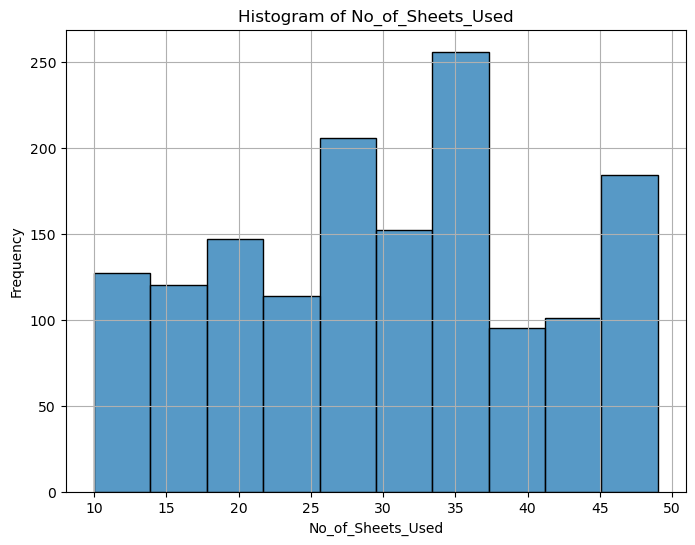

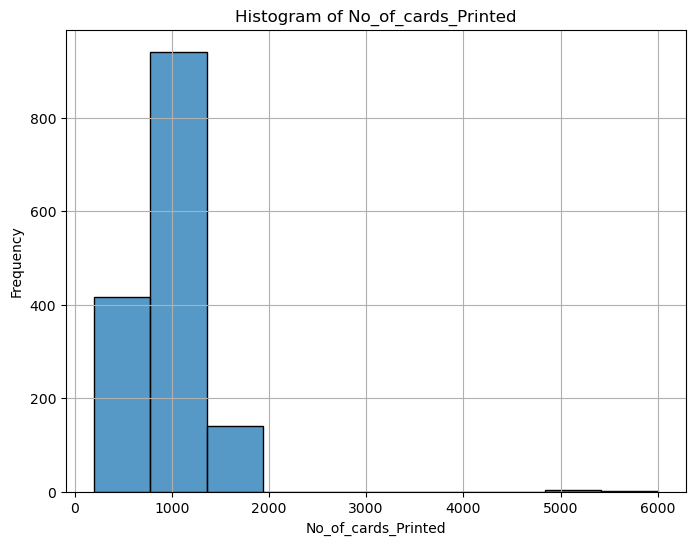

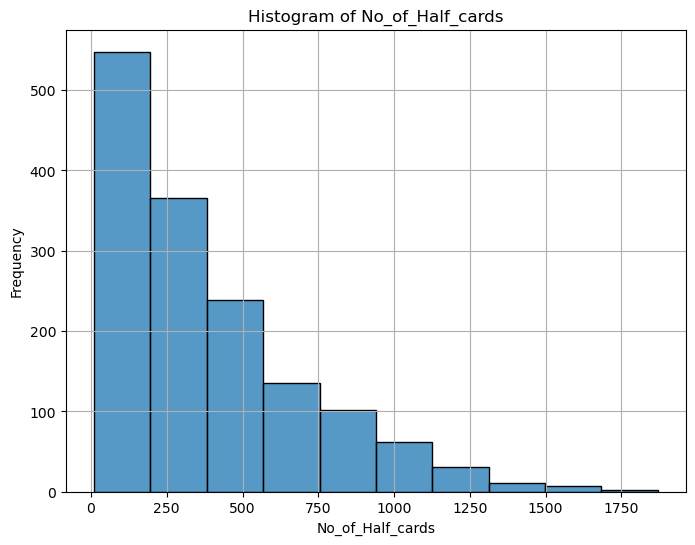

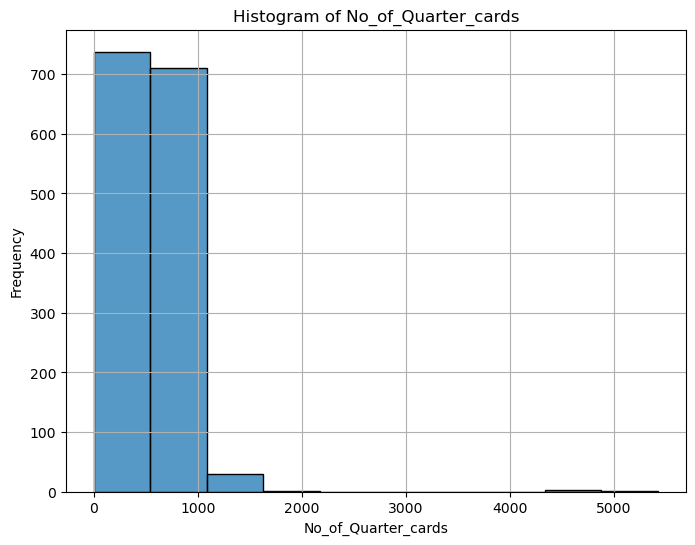

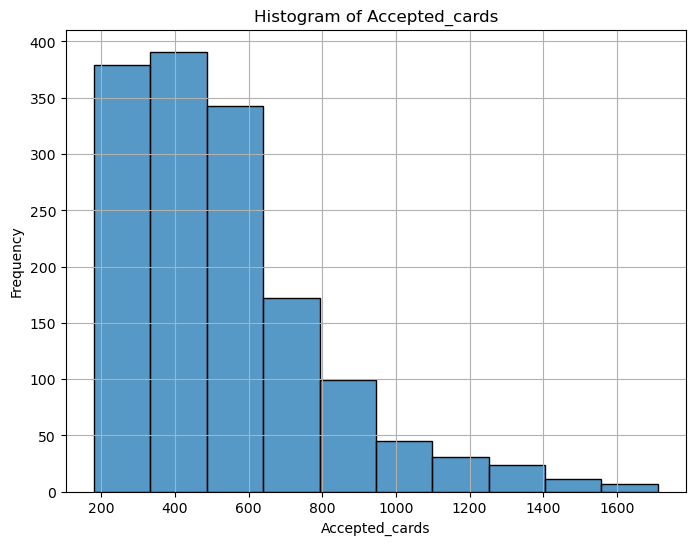

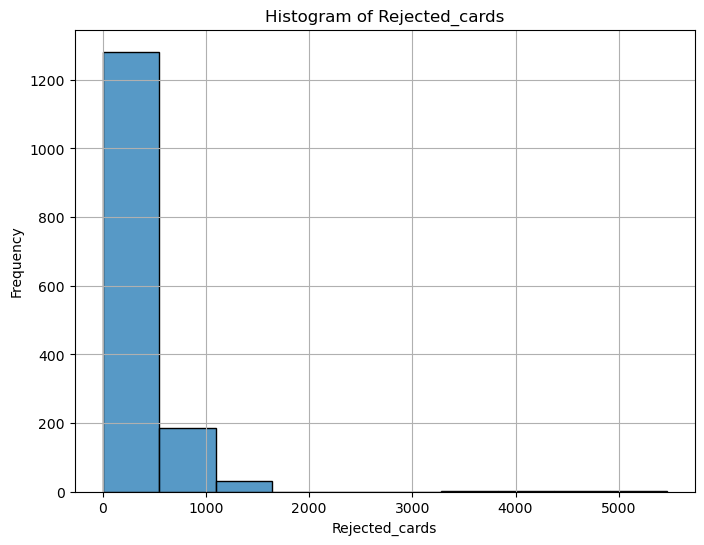

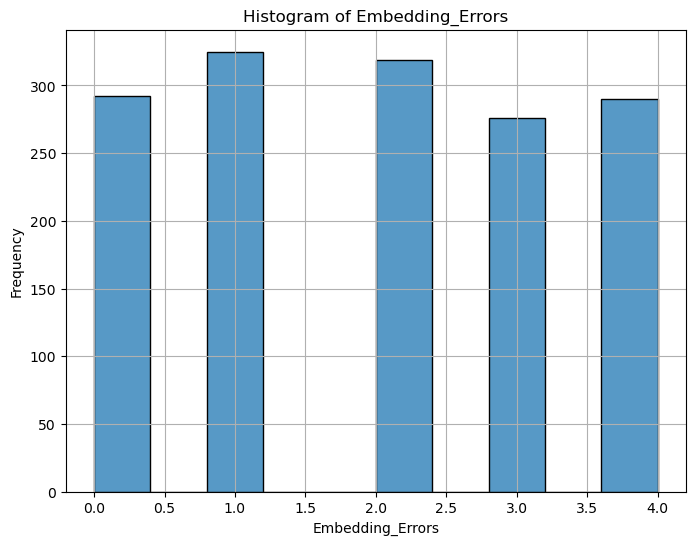

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
# Replace 'steel' with the name of your DataFrame


# Plotting histograms for all numeric columns in separate figures
numeric_columns = cards.select_dtypes(include=['int','float']).columns  # Select numeric columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each column
    sns.histplot(cards[column], kde=False, bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [186]:
#REMOVE DUPLICATE


In [159]:
duplicate= cards.duplicated
print(duplicate)

<bound method DataFrame.duplicated of         Batch_ID Job_Order_Number Printing_Date_Time Printer_Operator_ID  \
0       Batch_01         JO_00001         2022-01-01         Operator_39   
1       Batch_02         JO_00002         2022-01-01         Operator_29   
2       Batch_03         JO_00003         2022-01-01         Operator_15   
3       Batch_04         JO_00004         2022-01-02         Operator_43   
4       Batch_05         JO_00005         2022-01-02          Operator_8   
...          ...              ...                ...                 ...   
1497  Batch_1496         JO_01496         2022-01-01         Operator_43   
1498  Batch_1497         JO_01497         2022-01-01         Operator_43   
1499  Batch_1498         JO_01498         2022-01-01         Operator_43   
1500  Batch_1499         JO_01499         2022-01-01         Operator_43   
1501  Batch_1500         JO_01500         2022-01-01         Operator_43   

          Ink_Type           Paper_Type  No_of_Sh

In [161]:
import pandas as pd

# Load your dataset (replace 'cards.csv' with the actual file path)
cards_df = pd.DataFrame()  # Renaming the DataFrame to 'cards_df' to avoid conflicts

# Remove duplicate rows
cards = cards_df.drop_duplicates()

# Optionally, reset the index after removing duplicates
cards.reset_index(drop=True, inplace=True)

# Save the cleaned data to a new CSV file (optional)
cards_df.to_csv('cards_cleaned.csv', index=False)

# Display the first few rows of the cleaned dataset
print(cards.head())


Empty DataFrame
Columns: []
Index: []


In [60]:
cards=cards.drop_duplicates
print(cards)

<bound method DataFrame.drop_duplicates of         Batch_ID Job_Order_Number Printing_Date_Time Printer_Operator_ID  \
0       Batch_01         JO_00001         2022-01-01         Operator_39   
1       Batch_02         JO_00002         2022-01-01         Operator_29   
2       Batch_03         JO_00003         2022-01-01         Operator_15   
3       Batch_04         JO_00004         2022-01-02         Operator_43   
4       Batch_05         JO_00005         2022-01-02          Operator_8   
...          ...              ...                ...                 ...   
1495  Batch_1496         JO_01496         2022-01-01         Operator_43   
1496  Batch_1497         JO_01497         2022-01-01         Operator_43   
1497  Batch_1498         JO_01498         2022-01-01         Operator_43   
1498  Batch_1499         JO_01499         2022-01-01         Operator_43   
1499  Batch_1500         JO_01500         2022-01-01         Operator_43   

          Ink_Type           Paper_Type  No_

In [58]:
#MISSING VALUES

In [163]:
import pandas as pd

# Load your dataset into a DataFrame (adjust the file path if needed)
cards_df = pd.read_csv("D:\project_2_data.csv")  # Renaming the DataFrame to 'cards_df' to avoid conflicts

# Check for missing values (NaNs) in the dataset
print(cards_df.isna().sum())

# If you want to remove duplicate rows, use:
cards = cards_df.drop_duplicates()

# Optionally, reset the index after removing duplicates
cards.reset_index(drop=True, inplace=True)


# Display the first few rows of the cleaned dataset
print(cards)


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\admin\AppData\Local\Temp\ipykernel_10536\1109255913.py:4: SyntaxWarning: invalid escape sequence '\p'
  cards_df = pd.read_csv("D:\project_2_data.csv")  # Renaming the DataFrame to 'cards_df' to avoid conflicts


Batch ID                                     0
Job Order Number                             0
Printing Date/Time                           0
Printer Operator ID                          0
Ink Type                                     0
Paper Type                                   0
No. of Sheets Used                           0
No. of Cards Printed                         0
No. of Half Cards                            0
No. of Quarter Cards                        19
Accepted Cards                               0
Rejected Cards                               0
Color Matching Data                          0
Quality Control Result (Printing)            0
Printing QC - Alignment                      0
Printing QC - Color Accuracy                 0
Printing QC - Material Integrity             0
Lamination Date/Time                         0
Lamination Operator ID                       0
Chip Type                                    0
Embedding Errors                             0
Chip Serial N

In [165]:
import pandas as pd
import numpy as np



# Create DataFrame
df=pd.DataFrame(cards)

# Replace missing values with the median of each column
df.fillna(df.mode(), inplace=True)

print("DataFrame after replacing missing values with median:")
print(df)


DataFrame after replacing missing values with median:
        Batch ID Job Order Number Printing Date/Time Printer Operator ID  \
0       Batch_01         JO_00001        2022-01-01          Operator_39   
1       Batch_02         JO_00002        2022-01-01          Operator_29   
2       Batch_03         JO_00003        2022-01-01          Operator_15   
3       Batch_04         JO_00004        2022-01-02          Operator_43   
4       Batch_05         JO_00005        2022-01-02           Operator_8   
...          ...              ...                ...                 ...   
1495  Batch_1496         JO_01496        2022-01-01          Operator_43   
1496  Batch_1497         JO_01497        2022-01-01          Operator_43   
1497  Batch_1498         JO_01498        2022-01-01          Operator_43   
1498  Batch_1499         JO_01499        2022-01-01          Operator_43   
1499  Batch_1500         JO_01500        2022-01-01          Operator_43   

          Ink Type           Pape

In [ ]:
#OUTLIERS

In [167]:
import pandas as pd


# Now you can proceed with selecting numeric columns and identifying outliers
numeric_columns = cards.select_dtypes(include=['int', 'float']).columns

# Function to identify outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identifying outliers for each numeric column
outlier_dict = {}
for column in numeric_columns:
    outliers = identify_outliers(cards, column)
    outlier_dict[column] = outliers

# Print outliers for each numeric column
for column, outliers in outlier_dict.items():
    print(f'Outliers in {column}:\n{outliers}\n')


Outliers in No. of Sheets Used:
Empty DataFrame
Columns: [Batch ID, Job Order Number, Printing Date/Time, Printer Operator ID, Ink Type, Paper Type, No. of Sheets Used, No. of Cards Printed, No. of Half Cards, No. of Quarter Cards, Accepted Cards, Rejected Cards, Color Matching Data, Quality Control Result (Printing), Printing QC - Alignment, Printing QC - Color Accuracy, Printing QC - Material Integrity, Lamination Date/Time, Lamination Operator ID, Chip Type, Embedding Errors, Chip Serial Numbers, Quality Control Result (Embedding), Embedding QC - Chip Functionality, Embedding QC - Alignment, Network Data, Encryption Key, Laser Engraving Serial, ICCID, Personalization Operator ID, Quality Control Result (Personalization), Personalization QC - Data Accuracy, Personalization QC - Laser Engraving, Audit Trail Logs, PO_number]
Index: []

[0 rows x 35 columns]

Outliers in No. of Cards Printed:
        Batch ID Job Order Number Printing Date/Time Printer Operator ID  \
9       Batch_10   

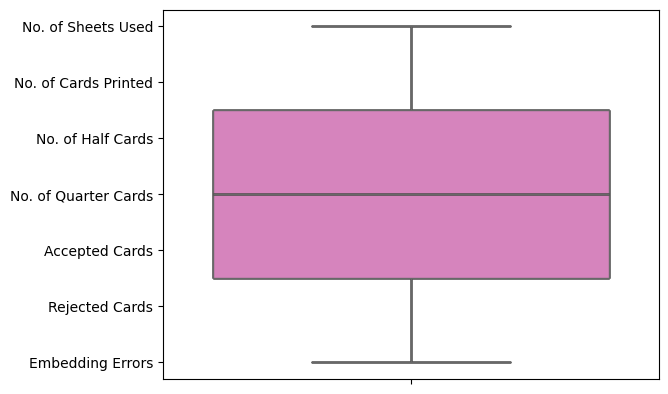

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
# Replace 'steel' with the name of your DataFrame


# Plotting histograms for all numeric columns in separate figures
numeric_columns = cards.select_dtypes(include=['int','float']).columns  # Select numeric columns

for column in numeric_columns:
    sns.boxplot(numeric_columns)


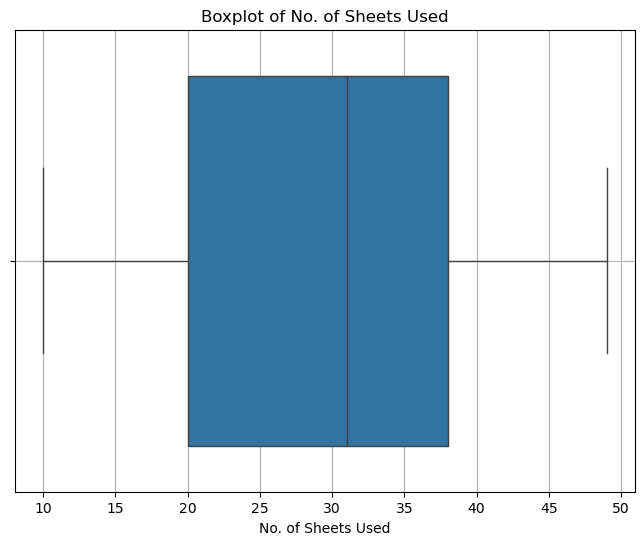

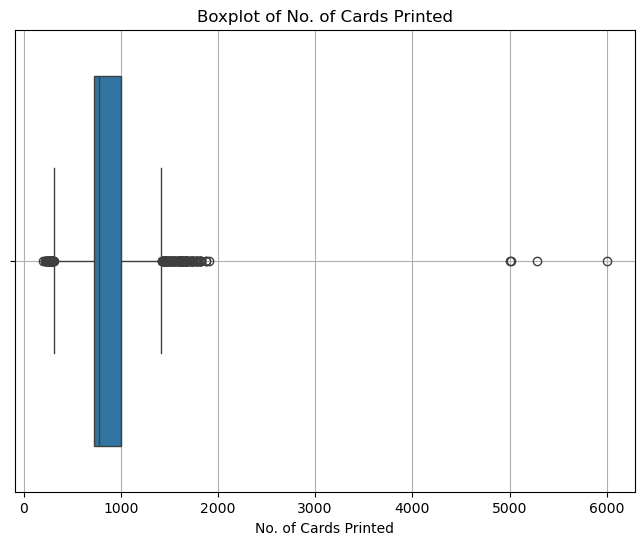

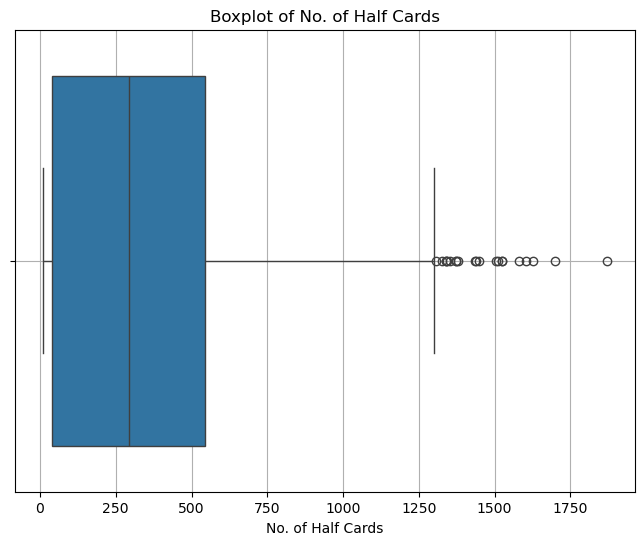

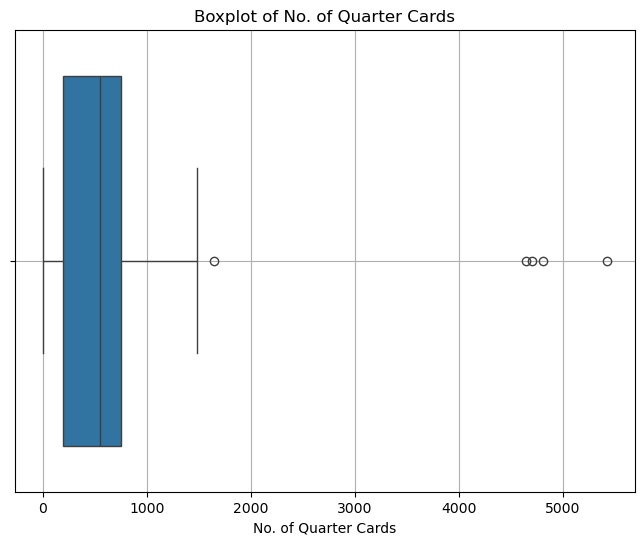

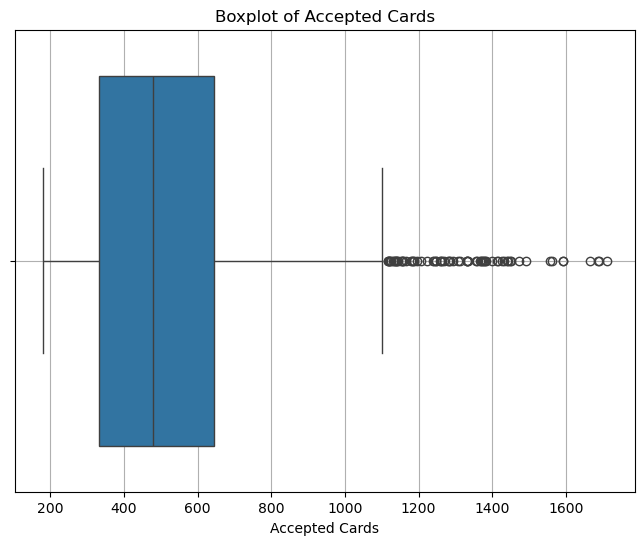

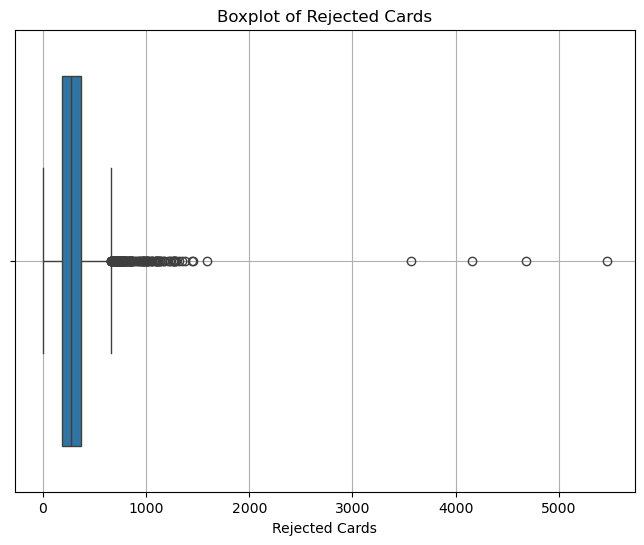

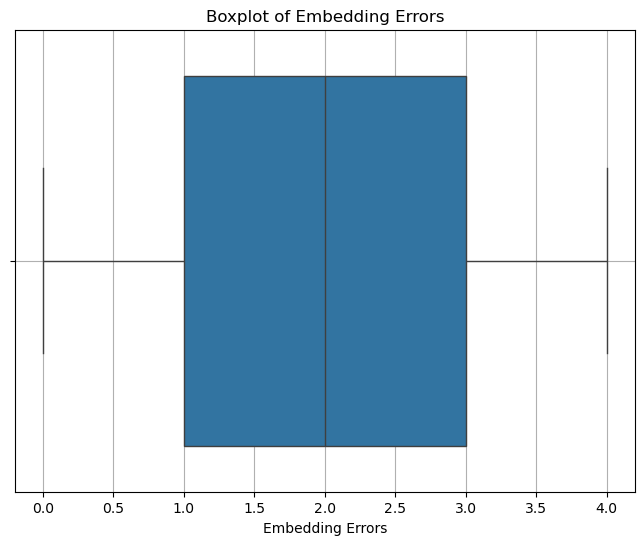

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace 'cards' with your actual DataFrame)
# Replace 'cards' with the name of your DataFrame
# cards = pd.DataFrame(...)

# Plotting boxplots for all numeric columns in separate figures
numeric_columns = cards.select_dtypes(include=['int', 'float']).columns  # Select numeric columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each column
    sns.boxplot(x=cards[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.grid(True)
    plt.show()


Outliers in No. of Sheets Used:
Empty DataFrame
Columns: [Batch ID, Job Order Number, Printing Date/Time, Printer Operator ID, Ink Type, Paper Type, No. of Sheets Used, No. of Cards Printed, No. of Half Cards, No. of Quarter Cards, Accepted Cards, Rejected Cards, Color Matching Data, Quality Control Result (Printing), Printing QC - Alignment, Printing QC - Color Accuracy, Printing QC - Material Integrity, Lamination Date/Time, Lamination Operator ID, Chip Type, Embedding Errors, Chip Serial Numbers, Quality Control Result (Embedding), Embedding QC - Chip Functionality, Embedding QC - Alignment, Network Data, Encryption Key, Laser Engraving Serial, ICCID, Personalization Operator ID, Quality Control Result (Personalization), Personalization QC - Data Accuracy, Personalization QC - Laser Engraving, Audit Trail Logs, PO_number]
Index: []

[0 rows x 35 columns]

Outliers in No. of Cards Printed:
        Batch ID Job Order Number Printing Date/Time Printer Operator ID  \
9       Batch_10   

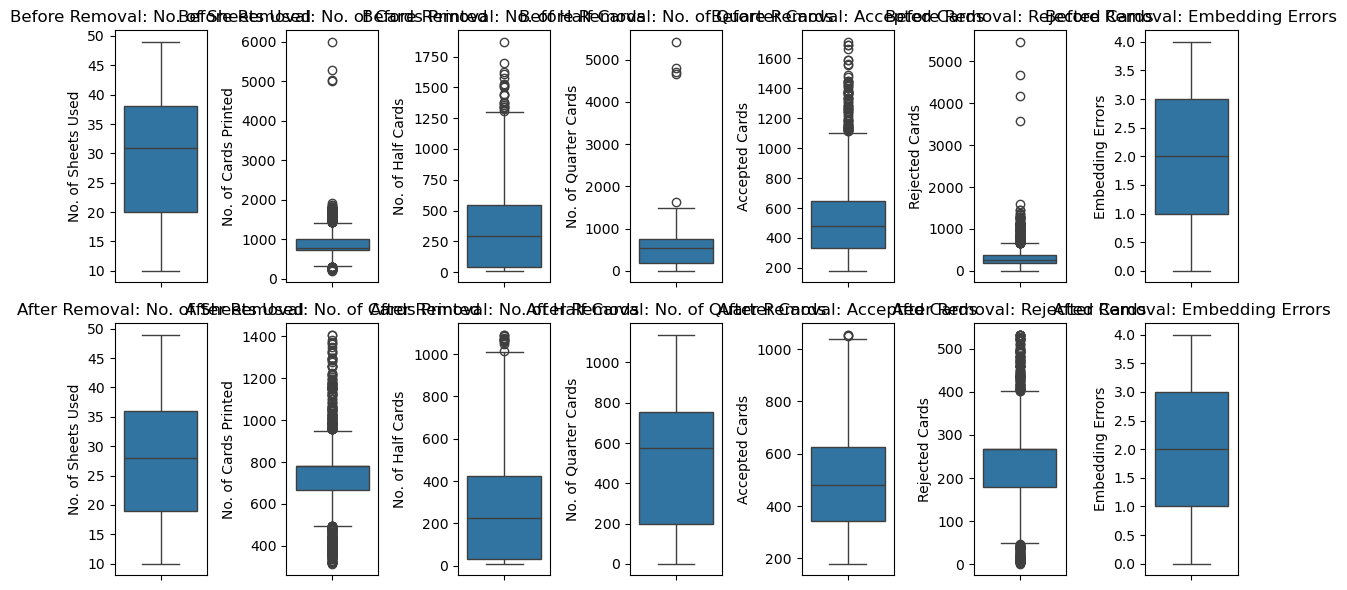

Original DataFrame size: 1500
Cleaned DataFrame size: 1138


In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select numeric columns
numeric_columns = cards.select_dtypes(include=['int', 'float']).columns

# Function to identify outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Function to remove outliers
def remove_outliers(df):
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Identify outliers for each numeric column and print them
outlier_dict = {}
for column in numeric_columns:
    outliers = identify_outliers(cards, column)
    outlier_dict[column] = outliers
    print(f'Outliers in {column}:\n{outliers}\n')

# Remove outliers from the DataFrame
cleaned_cards = remove_outliers(cards)

# Visualize data before and after outlier removal using boxplots
plt.figure(figsize=(12, 6))

# Boxplots before outlier removal
for i, column in enumerate(numeric_columns):
    plt.subplot(2, len(numeric_columns), i + 1)
    sns.boxplot(y=cards[column])
    plt.title(f'Before Removal: {column}')

# Boxplots after outlier removal
for i, column in enumerate(numeric_columns):
    plt.subplot(2, len(numeric_columns), i + 1 + len(numeric_columns))
    sns.boxplot(y=cleaned_cards[column])
    plt.title(f'After Removal: {column}')

plt.tight_layout()
plt.show()

# Print the size of original and cleaned DataFrame
print(f'Original DataFrame size: {cards.shape[0]}')
print(f'Cleaned DataFrame size: {cleaned_cards.shape[0]}')


In [173]:
cards.shape

(1500, 35)

In [175]:
# Save the 'cards' DataFrame to a CSV file
cards.to_csv('PROJECT_2_POWER BI.csv', index=False)

# Alternatively, if you're using the cleaned dataset:
# cards_cleaned.to_csv('cards_cleaned.csv', index=False)
